In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA25\ML\Ensemble")

In [3]:
taxi_data=pd.read_parquet("yellow_tripdata_2022-06.parquet") 

In [4]:
taxi_data.shape

(3558124, 19)

In [5]:
from sklearn.model_selection import train_test_split
taxi,_=train_test_split(taxi_data, test_size=.98,random_state=0)

In [6]:
taxi.shape

(71162, 19)

In [7]:
taxi.head() 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,1.0,N,143,48,1,9.5,0.0,0.5,2.00,0.0,0.3,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,1.0,N,143,95,2,36.0,0.0,0.5,0.00,0.0,0.3,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,1.0,N,249,80,1,20.0,3.0,0.5,2.00,0.0,0.3,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,1.0,N,230,113,1,13.5,1.0,0.5,1.78,0.0,0.3,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,1.0,N,90,237,1,14.5,0.5,0.5,2.74,0.0,0.3,21.04,2.5,0.0


### EDA

In [8]:
taxi["VendorID"].value_counts()

2    50189
1    20830
6      143
Name: VendorID, dtype: int64

In [9]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    sns.countplot(data=data, x=x)
    plt.show()

Total missing values : 0

Total count of unique categories: 3

Unique categories :
[2, 1, 6]
Value count and %
    Count percentage
2  50189     70.53%
1  20830     29.27%
6    143       0.2%


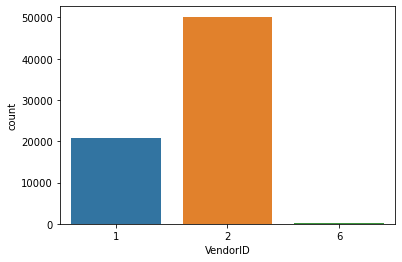

In [10]:
univariate_cat(data=taxi, x="VendorID")

In [11]:
taxi["VendorID"]=taxi["VendorID"].replace([6,5] , "Others")
taxi["VendorID"].value_counts()

2         50189
1         20830
Others      143
Name: VendorID, dtype: int64

In [12]:
taxi.dtypes[taxi.dtypes=="object"]

VendorID              object
store_and_fwd_flag    object
dtype: object

Total missing values : 2660

Total count of unique categories: 2

Unique categories :
['N', None, 'Y']
Value count and %
       Count percentage
N     67674     98.79%
None   2660        NaN
Y       828      1.21%


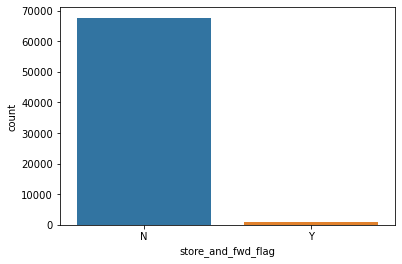

In [13]:
univariate_cat(data=taxi, x="store_and_fwd_flag")

In [14]:
taxi["store_and_fwd_flag"]=taxi["store_and_fwd_flag"].replace(np.nan, "other")

In [15]:
taxi["store_and_fwd_flag"].isnull().sum()

0

In [16]:
taxi["RatecodeID"].value_counts(dropna=False)

1.0     64553
2.0      2826
NaN      2660
5.0       612
3.0       217
99.0      206
4.0        88
Name: RatecodeID, dtype: int64

In [17]:
taxi["RatecodeID"]=taxi["RatecodeID"].map({1:"Standard_rate",
                                          2:"JFK",
                                          3:"Newark",
                                          4:"Nassau_or_Westchester",
                                          5:"Negotiated_fare",
                                          6:"Group_ride",
                                          99:"other"})


In [18]:
# 1= Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

Total missing values : 2660

Total count of unique categories: 6

Unique categories :
['Standard_rate', nan, 'Negotiated_fare', 'JFK', 'Newark', 'Nassau_or_Westchester', 'other']
Value count and %
                        Count percentage
Standard_rate          64553     94.24%
JFK                     2826      4.13%
NaN                     2660        NaN
Negotiated_fare          612      0.89%
Newark                   217      0.32%
other                    206       0.3%
Nassau_or_Westchester     88      0.13%


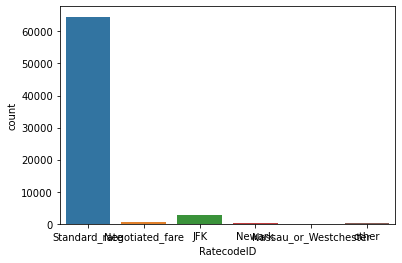

In [19]:
univariate_cat(data=taxi, x="RatecodeID")

In [20]:
taxi["RatecodeID"]=taxi["RatecodeID"].replace(np.nan, "other")

In [21]:
taxi["RatecodeID"].value_counts(dropna=False)

Standard_rate            64553
other                     2866
JFK                       2826
Negotiated_fare            612
Newark                     217
Nassau_or_Westchester       88
Name: RatecodeID, dtype: int64

Total missing values : 0

Total count of unique categories: 5

Unique categories :
[1, 2, 0, 4, 3]
Value count and %
    Count percentage
1  53921     75.77%
2  13873     19.49%
0   2660      3.74%
3    363      0.51%
4    345      0.48%


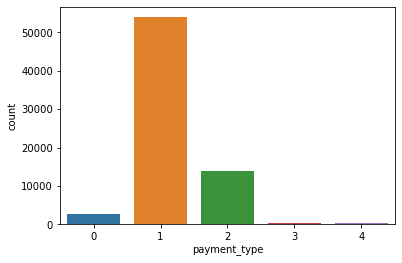

In [22]:
univariate_cat(data=taxi, x="payment_type")

In [23]:
taxi["payment_type"]=taxi["payment_type"].map({1:"Creidt_card", 2:"Cash",
                                               3:"No_charge",4:"Dispute",
                                              0:"Unkown"})

In [24]:
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5, 0= Unknown
# 6= Voided trip
taxi["payment_type"].value_counts(dropna=False)

Creidt_card    53921
Cash           13873
Unkown          2660
No_charge        363
Dispute          345
Name: payment_type, dtype: int64

In [25]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,143,48,Creidt_card,9.5,0.0,0.5,2.00,0.0,0.3,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,143,95,Cash,36.0,0.0,0.5,0.00,0.0,0.3,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,249,80,Creidt_card,20.0,3.0,0.5,2.00,0.0,0.3,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,230,113,Creidt_card,13.5,1.0,0.5,1.78,0.0,0.3,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,90,237,Creidt_card,14.5,0.5,0.5,2.74,0.0,0.3,21.04,2.5,0.0


In [26]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
#     sns.histplot(data[x])
#     plt.show()
#     sns.boxplot(data=data, y=data[x])
#     plt.show()
    return myvalue

In [27]:
univariate_num(data=taxi, x="passenger_count")

{'missing': 2660,
 'min': 0.0,
 'max': 6.0,
 'mean': 1.4,
 'var': 0.92,
 'std': 0.96,
 'range': 6.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.74,
 'kurtosis': 8.32}

In [28]:
univariate_num(data=taxi, x="trip_distance")

{'missing': 0,
 'min': 0.0,
 'max': 111375.9,
 'mean': 5.14,
 'var': 174326.41,
 'std': 417.52,
 'range': 111375.9,
 'q1': 1.14,
 'q2': 1.94,
 'q3': 3.63,
 'skewness': 266.71,
 'kurtosis': 71143.4}

<AxesSubplot:ylabel='trip_distance'>

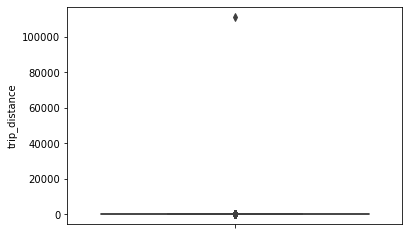

In [29]:
sns.boxplot(data=taxi, y="trip_distance")

In [30]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,143,48,Creidt_card,9.5,0.0,0.5,2.00,0.0,0.3,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,143,95,Cash,36.0,0.0,0.5,0.00,0.0,0.3,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,249,80,Creidt_card,20.0,3.0,0.5,2.00,0.0,0.3,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,230,113,Creidt_card,13.5,1.0,0.5,1.78,0.0,0.3,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,90,237,Creidt_card,14.5,0.5,0.5,2.74,0.0,0.3,21.04,2.5,0.0


In [31]:
univariate_num(data=taxi, x="PULocationID")

{'missing': 0,
 'min': 1,
 'max': 265,
 'mean': 164.48,
 'var': 4309.39,
 'std': 65.65,
 'range': 264,
 'q1': 132.0,
 'q2': 162.0,
 'q3': 234.0,
 'skewness': -0.26,
 'kurtosis': -0.89}

Total missing values : 0

Total count of unique categories: 207

Unique categories :
[143, 249, 230, 90, 142, 186, 264, 87, 100, 163, 75, 237, 68, 43, 161, 170, 239, 70, 41, 236, 138, 148, 231, 246, 144, 141, 79, 107, 234, 229, 162, 164, 42, 265, 48, 132, 238, 233, 263, 140, 137, 166, 262, 50, 4, 151, 65, 125, 113, 13, 24, 215, 232, 33, 88, 158, 211, 244, 114, 261, 74, 224, 181, 223, 255, 69, 157, 225, 61, 45, 116, 209, 21, 193, 28, 7, 55, 3, 205, 66, 152, 248, 112, 9, 203, 191, 226, 219, 256, 173, 146, 37, 80, 216, 40, 145, 77, 202, 25, 12, 117, 129, 1, 135, 51, 247, 179, 62, 95, 52, 93, 39, 168, 92, 235, 14, 243, 200, 259, 260, 159, 49, 56, 10, 17, 72, 97, 167, 131, 82, 130, 32, 126, 147, 182, 122, 121, 198, 102, 106, 254, 119, 227, 38, 228, 197, 242, 22, 207, 196, 212, 257, 63, 169, 71, 188, 134, 60, 218, 210, 19, 91, 250, 189, 165, 89, 23, 35, 124, 8, 83, 222, 153, 201, 53, 67, 190, 220, 36, 139, 34, 180, 120, 115, 195, 29, 76, 217, 208, 177, 150, 108, 127, 18, 73, 78, 5, 241, 54, 

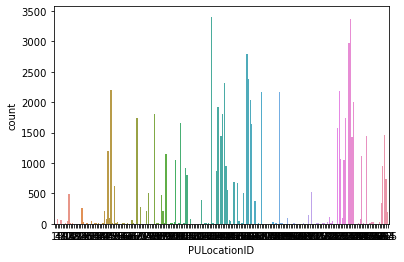

In [32]:
univariate_cat(data=taxi, x="PULocationID")

Total missing values : 0

Total count of unique categories: 243

Unique categories :
[48, 95, 80, 113, 237, 107, 162, 239, 236, 264, 233, 151, 47, 211, 209, 116, 238, 50, 37, 246, 164, 161, 230, 262, 87, 140, 166, 232, 141, 163, 114, 143, 231, 43, 158, 68, 234, 170, 146, 263, 33, 42, 138, 142, 75, 90, 186, 265, 188, 125, 137, 167, 229, 148, 45, 13, 4, 79, 181, 132, 144, 223, 100, 235, 202, 249, 1, 74, 7, 41, 40, 197, 51, 247, 261, 139, 49, 193, 17, 16, 152, 88, 206, 35, 65, 145, 24, 244, 124, 243, 175, 29, 168, 198, 224, 66, 70, 256, 182, 228, 127, 255, 25, 258, 226, 56, 225, 160, 112, 117, 19, 91, 61, 200, 89, 227, 133, 22, 134, 216, 126, 97, 218, 12, 155, 135, 18, 69, 165, 220, 36, 129, 250, 219, 38, 11, 205, 10, 174, 64, 14, 52, 123, 191, 179, 39, 189, 54, 212, 28, 106, 196, 86, 26, 92, 93, 20, 85, 248, 136, 76, 210, 217, 83, 23, 215, 208, 31, 195, 171, 222, 173, 62, 178, 192, 63, 190, 180, 260, 203, 257, 102, 55, 131, 121, 3, 147, 201, 130, 194, 128, 82, 159, 15, 240, 32, 252, 67, 

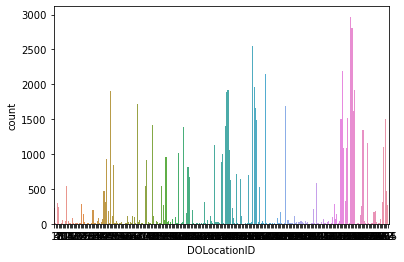

In [33]:
univariate_cat(data=taxi, x="DOLocationID")

In [34]:
taxi.drop(columns=["DOLocationID", "PULocationID"], inplace=True)

In [35]:
univariate_num(data=taxi, x="fare_amount")

{'missing': 0,
 'min': -500.0,
 'max': 6977.0,
 'mean': 15.3,
 'var': 2259.4,
 'std': 47.53,
 'range': 7477.0,
 'q1': 7.0,
 'q2': 10.5,
 'q3': 16.5,
 'skewness': 132.37,
 'kurtosis': 19353.71}

In [36]:
upper=16.5 +1.5*(16.5-7)
upper

30.75

In [37]:
taxi[taxi["fare_amount"]<2.5].shape

(525, 17)

In [38]:
taxi.shape

(71162, 17)

In [39]:
(71000-5000)/71000

0.9295774647887324

In [40]:
taxi1=taxi[taxi["fare_amount"]>=2.5]

In [41]:
taxi1.shape

(70637, 17)

<AxesSubplot:ylabel='fare_amount'>

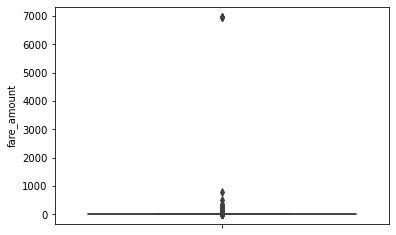

In [42]:
sns.boxplot(data=taxi1, y="fare_amount")

In [43]:
taxi1[taxi1["fare_amount"]>30.75].shape

(7451, 17)

In [44]:
taxi1["fare_amount"].describe(percentiles=[.75,.8,.9,.95,.96,.97,.98,.99])

count    70637.000000
mean        15.515271
std         47.583181
min          2.500000
50%         10.500000
75%         16.500000
80%         19.500000
90%         32.000000
95%         52.000000
96%         52.000000
97%         52.000000
98%         52.000000
99%         64.000000
max       6977.000000
Name: fare_amount, dtype: float64

In [45]:
taxi1.dtypes[taxi1.dtypes!="object"].index

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [46]:
'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount','congestion_surcharge', 'airport_fee'
univariate_num(data=taxi1, x="extra")

{'missing': 0,
 'min': 0.0,
 'max': 8.25,
 'mean': 1.03,
 'var': 1.58,
 'std': 1.26,
 'range': 8.25,
 'q1': 0.0,
 'q2': 0.5,
 'q3': 2.5,
 'skewness': 1.14,
 'kurtosis': 0.75}

In [47]:
taxi1[taxi1["extra"]==0].shape

(28530, 17)

In [48]:
'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount','congestion_surcharge', 'airport_fee'
univariate_num(data=taxi1, x="mta_tax")

{'missing': 0,
 'min': 0.0,
 'max': 2.78,
 'mean': 0.49,
 'var': 0.0,
 'std': 0.05,
 'range': 2.78,
 'q1': 0.5,
 'q2': 0.5,
 'q3': 0.5,
 'skewness': -6.5,
 'kurtosis': 188.41}

<AxesSubplot:ylabel='mta_tax'>

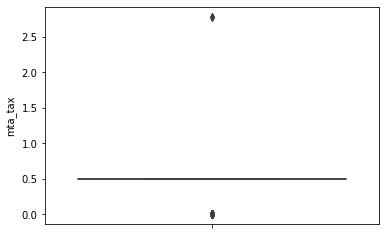

In [49]:
sns.boxplot(data=taxi1, y="mta_tax")

In [50]:
'tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount','congestion_surcharge', 'airport_fee'
univariate_num(data=taxi1, x="tip_amount")

{'missing': 0,
 'min': 0.0,
 'max': 98.0,
 'mean': 2.81,
 'var': 10.4,
 'std': 3.22,
 'range': 98.0,
 'q1': 1.0,
 'q2': 2.2,
 'q3': 3.45,
 'skewness': 3.82,
 'kurtosis': 44.22}

<AxesSubplot:ylabel='tip_amount'>

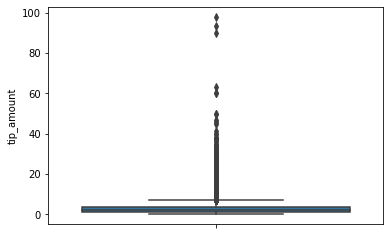

In [51]:
sns.boxplot(data=taxi1, y="tip_amount")

In [52]:
'tolls_amount', 'improvement_surcharge', 'total_amount','congestion_surcharge', 'airport_fee'
univariate_num(data=taxi1, x="tolls_amount")

{'missing': 0,
 'min': 0.0,
 'max': 52.0,
 'mean': 0.57,
 'var': 4.33,
 'std': 2.08,
 'range': 52.0,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 4.8,
 'kurtosis': 36.86}

<AxesSubplot:ylabel='tolls_amount'>

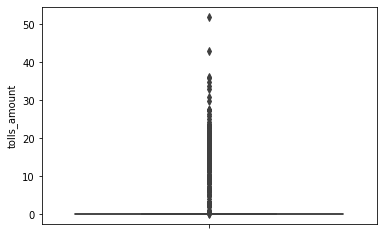

In [53]:
sns.boxplot(data=taxi1, y="tolls_amount")

In [54]:
'improvement_surcharge', 'total_amount','congestion_surcharge', 'airport_fee'
univariate_num(data=taxi1, x="improvement_surcharge")

{'missing': 0,
 'min': 0.0,
 'max': 0.3,
 'mean': 0.3,
 'var': 0.0,
 'std': 0.0,
 'range': 0.3,
 'q1': 0.3,
 'q2': 0.3,
 'q3': 0.3,
 'skewness': -76.71,
 'kurtosis': 5881.83}

<AxesSubplot:ylabel='improvement_surcharge'>

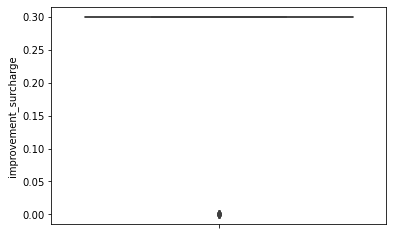

In [55]:
sns.boxplot(data=taxi1, y="improvement_surcharge")

In [56]:
taxi1[taxi1["improvement_surcharge"]==0].shape

(12, 17)

In [57]:
taxi1.drop(columns=["improvement_surcharge"], inplace=True)

C:\Users\Archit\AppData\Local\Temp/ipykernel_18208/2366615226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1.drop(columns=["improvement_surcharge"], inplace=True)


In [58]:
# taxi1.head()

In [59]:
'total_amount','congestion_surcharge', 'airport_fee'
univariate_num(data=taxi1, x="total_amount")

{'missing': 0,
 'min': 3.3,
 'max': 6981.3,
 'mean': 22.45,
 'var': 2374.85,
 'std': 48.73,
 'range': 6978.0,
 'q1': 12.36,
 'q2': 16.3,
 'q3': 23.3,
 'skewness': 123.63,
 'kurtosis': 17609.46}

<AxesSubplot:ylabel='total_amount'>

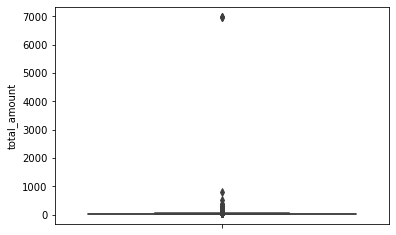

In [60]:
sns.boxplot(data=taxi1, y="total_amount") 

In [61]:
'congestion_surcharge', 'airport_fee'
univariate_num(data=taxi1, x="congestion_surcharge")

{'missing': 2658,
 'min': 0.0,
 'max': 2.5,
 'mean': 2.31,
 'var': 0.44,
 'std': 0.67,
 'range': 2.5,
 'q1': 2.5,
 'q2': 2.5,
 'q3': 2.5,
 'skewness': -3.17,
 'kurtosis': 8.08}

In [62]:
'airport_fee'
univariate_num(data=taxi1, x="airport_fee")

{'missing': 2658,
 'min': 0.0,
 'max': 1.25,
 'mean': 0.1,
 'var': 0.11,
 'std': 0.34,
 'range': 1.25,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 3.15,
 'kurtosis': 7.92}

<AxesSubplot:ylabel='airport_fee'>

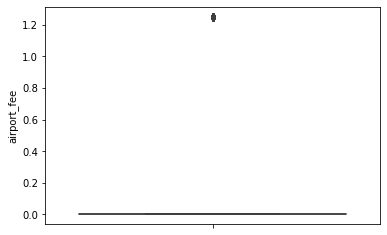

In [63]:
sns.boxplot(data=taxi1, y="airport_fee")

In [64]:
taxi1[taxi1["airport_fee"]==0].shape

(62683, 16)

## Feature Engineering 

In [65]:
taxi1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [66]:
taxi1["tpep_pickup_datetime"].min()

Timestamp('2002-10-21 12:53:50')

In [67]:
taxi1["tpep_pickup_datetime"].max()

Timestamp('2022-07-01 00:36:12')

In [68]:
# Date : month , weekend / weekday, public_holiday, time of pickup (early morning, morning, afternoon, evening, night , late night) 
# two date : duration

In [69]:
taxi1["month"]=taxi1["tpep_pickup_datetime"].dt.month
taxi1["year"]=taxi1["tpep_pickup_datetime"].dt.year
taxi1["week_of_day"]=taxi1["tpep_pickup_datetime"].dt.dayofweek
taxi1["day"]=taxi1["tpep_pickup_datetime"].dt.day
taxi1["hours"]=taxi1["tpep_pickup_datetime"].dt.hour
taxi1["minutes"]=taxi1["tpep_pickup_datetime"].dt.minute


C:\Users\Archit\AppData\Local\Temp/ipykernel_18208/1187736738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1["month"]=taxi1["tpep_pickup_datetime"].dt.month
C:\Users\Archit\AppData\Local\Temp/ipykernel_18208/1187736738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1["year"]=taxi1["tpep_pickup_datetime"].dt.year
C:\Users\Archit\AppData\Local\Temp/ipykernel_18208/1187736738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [70]:
taxi1["day"].value_counts()

9     2650
23    2636
17    2617
16    2612
15    2594
3     2562
24    2539
2     2527
10    2523
1     2520
8     2519
7     2474
14    2440
11    2393
21    2389
4     2388
22    2376
29    2357
30    2351
25    2346
13    2326
18    2274
6     2200
28    2181
12    2061
5     2032
27    2023
19    1990
20    1954
26    1782
31       1
Name: day, dtype: int64

In [71]:
taxi1=taxi1[taxi1["month"]==6]

taxi1=taxi1[taxi1["year"]==2022]


In [72]:
taxi1["isweekend"]=np.where(taxi1["week_of_day"].isin([5,6]),1,0 )

In [73]:
def day_cut(x):
    if x<=10:
        return "starting_of_month"
    elif x >10 and x<=20:
        return "mid_of_month"
    else:
        return "End_of_month"
taxi1["day_cat"]=taxi1["day"].apply(lambda a : day_cut(a))

In [74]:
taxi1["day_cat"].value_counts()

starting_of_month    24393
mid_of_month         23261
End_of_month         22973
Name: day_cat, dtype: int64

In [75]:
# taxi1["hours"].value_counts()

In [78]:
# early mor :4 - 8 
# mor : 8-12
# afternoon : 12 -16
# even : 16-20
# night : 20-24
# mid night : 24 - 4

In [79]:
taxi1["hours"].dtypes

dtype('int64')

In [80]:
def hour_category(x):
    if x >=4 and x<8 :
        return "early_morning"
    elif x>=8 and x<12:
        return "morning"
    elif x>=12 and x<16:
        return "Afternoon"
    elif x>=16 and x<20:
        return "Evening"
    elif x>=20 and x<=24:
        return "night"
    elif x>=0 and x<4:
        return "midNight"
    else:
        return "Unkown"
taxi1["hours_cat"]=taxi1["hours"].apply(lambda a : hour_category(a))

In [81]:
taxi1["hours_cat"].value_counts()

Evening          18554
Afternoon        16450
night            14011
morning          12794
midNight          4824
early_morning     3994
Name: hours_cat, dtype: int64

In [82]:
# taxi1["duration"]=((taxi1["tpep_dropoff_datetime"]-taxi1["tpep_pickup_datetime"])*24).astype('timedelta64[h]')

In [83]:
taxi1["duration"]=((taxi1["tpep_dropoff_datetime"]-taxi1["tpep_pickup_datetime"]))/pd.Timedelta(minutes=1)

In [84]:
# taxi1["duration"].min()

In [85]:
# taxi1["duration"].max() 

In [86]:
# sns.histplot(data=taxi1, x="duration")

In [87]:
def duration_cat(x):
    if x<15:
        return "duration_bt_0_15m"
    elif x>=15 and x<30:
        return "duration_bt_15_30m"
    elif x>=30 and x<60:
        return "duration_bt_30_60m"
    elif x>=60 and x<120:
        return "duration_bt_60_120m"
    else:
        return "duration_morethan_120m"
taxi1["duration_cat"]=taxi1["duration"].apply(lambda y: duration_cat(y))

In [88]:
taxi1["duration_cat"].value_counts()

duration_bt_0_15m         41741
duration_bt_15_30m        20678
duration_bt_30_60m         6757
duration_bt_60_120m        1350
duration_morethan_120m      101
Name: duration_cat, dtype: int64

In [89]:
taxi1["airport_pick_up"]=np.where(taxi1["airport_fee"]==0,0,1)

In [90]:
taxi1.head() 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,week_of_day,day,hours,minutes,isweekend,day_cat,hours_cat,duration,duration_cat,airport_pick_up
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,Creidt_card,9.5,0.0,...,2,1,8,48,0,starting_of_month,morning,12.166667,duration_bt_0_15m,0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,...,2,29,12,30,0,End_of_month,Afternoon,49.183333,duration_bt_30_60m,0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,Creidt_card,20.0,3.0,...,6,19,1,3,1,mid_of_month,midNight,23.900000,duration_bt_15_30m,0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,Creidt_card,13.5,1.0,...,0,6,17,16,0,starting_of_month,Evening,18.900000,duration_bt_15_30m,0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,Creidt_card,14.5,0.5,...,2,15,22,9,0,mid_of_month,night,18.483333,duration_bt_15_30m,0


In [91]:
# taxi1['fare-bin'] = pd.cut(taxi1['total_amount'], bins = list(range(0, 100, 5)))
# taxi1['fare-bin'].value_counts().plot.bar(color = 'b', edgecolor = 'r');
# plt.title('Fare Binned')

In [92]:
def fare_cut(x):
    if x<=10:
        return "(0, 10]"
    elif x>10 and x<=20:
        return "(10-20]"
    elif x>20 and x<=30:
        return "(20,30]"
    elif x>30 and x<=40:
        return "(30,40]"
    elif x>40 and x<=50:
        return "(40,50]"
    elif x>50 and x<=60:
        return "(50,60]"
    elif x>60 and x<=70:
        return "(60,70]"
    elif x>70 and x<=80:
        return "(70,80]"
    elif x>80 and x<=90:
        return "(80,90]"
    elif x>90 and x<=100:
        return "(90,100]"
    else:
        return "100+"
taxi1["fare_cat"]=taxi1["total_amount"].apply(lambda a : fare_cut(a))

<AxesSubplot:>

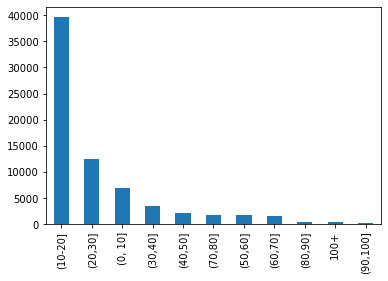

In [93]:
taxi1["fare_cat"].value_counts().plot(kind="bar")

## missing value Treatment

In [94]:
taxi1.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2658
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge     2658
airport_fee              2658
month                       0
year                        0
week_of_day                 0
day                         0
hours                       0
minutes                     0
isweekend                   0
day_cat                     0
hours_cat                   0
duration                    0
duration_cat                0
airport_pick_up             0
fare_cat                    0
dtype: int64

In [ ]:
taxi1["tpep_pickup_datetime"].dt.is_leap_year

In [95]:
temp0=taxi1[taxi1["passenger_count"].isnull()]

In [96]:
temp0.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2658
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge     2658
airport_fee              2658
month                       0
year                        0
week_of_day                 0
day                         0
hours                       0
minutes                     0
isweekend                   0
day_cat                     0
hours_cat                   0
duration                    0
duration_cat                0
airport_pick_up             0
fare_cat                    0
dtype: int64

In [97]:
taxi2=taxi1.dropna()

In [98]:
taxi2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
airport_fee              0
month                    0
year                     0
week_of_day              0
day                      0
hours                    0
minutes                  0
isweekend                0
day_cat                  0
hours_cat                0
duration                 0
duration_cat             0
airport_pick_up          0
fare_cat                 0
dtype: int64

### Outliers

In [99]:
taxi2.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,67969.0,1.398682,0.959825,0.0,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.00,2.00,3.000000,4.0000,4.000000,5.000000,6.000,6.000000
trip_distance,67969.0,3.541137,4.782556,0.0,0.000000,0.250000,0.4,0.470000,0.510000,1.130000,1.900000,3.55,9.02,15.496000,17.0928,17.879600,18.680000,20.260,410.170000
fare_amount,67969.0,15.271000,48.398615,2.5,3.500000,4.000000,4.0,4.500000,4.500000,7.000000,10.500000,16.50,31.20,52.000000,52.0000,52.000000,52.000000,62.500,6977.000000
extra,67969.0,1.069702,1.263564,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,2.50,3.00,3.500000,3.5000,3.500000,3.500000,3.750,8.250000
mta_tax,67969.0,0.494910,0.052014,0.0,0.000000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.50,0.50,0.500000,0.5000,0.500000,0.500000,0.500,2.780000
tip_amount,67969.0,2.765738,3.209275,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.160000,3.36,5.66,9.550000,10.2700,11.960000,12.620000,15.000,98.000000
tolls_amount,67969.0,0.562375,2.062867,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,6.550000,6.5500,6.550000,6.550000,6.550,52.000000
total_amount,67969.0,22.169266,49.525152,3.3,6.800000,7.800000,8.3,8.760000,8.800000,12.350000,15.960000,22.88,43.35,63.100000,67.8528,73.100000,75.720000,81.120,6981.300000
congestion_surcharge,67969.0,2.307670,0.666214,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.500000,2.500000,2.50,2.50,2.500000,2.5000,2.500000,2.500000,2.500,2.500000
airport_fee,67969.0,0.097361,0.334997,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,1.250000,1.2500,1.250000,1.250000,1.250,1.250000


In [100]:
taxi2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee',
       'month', 'year', 'week_of_day', 'day', 'hours', 'minutes', 'isweekend',
       'day_cat', 'hours_cat', 'duration', 'duration_cat', 'airport_pick_up',
       'fare_cat'],
      dtype='object')

In [101]:
taxi2.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

C:\Users\Archit\AppData\Local\Temp/ipykernel_18208/1635395133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi2.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)


In [102]:
obj_var=taxi2.dtypes[taxi2.dtypes=="object"].index
num_var=taxi2.dtypes[taxi2.dtypes!="object"].index

In [103]:
taxi_num=taxi2[num_var]
taxi_obj=taxi2[obj_var]

In [104]:
# taxi_num

In [106]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x
taxi_num=taxi_num.apply(lambda a: outliers(a))

In [107]:
taxi_final=pd.concat([taxi_num,taxi_obj ], axis=1)

### Multicollinearity

In [111]:
taxi_final.drop(columns=["month", "year", "fare_amount"], inplace=True)

<AxesSubplot:>

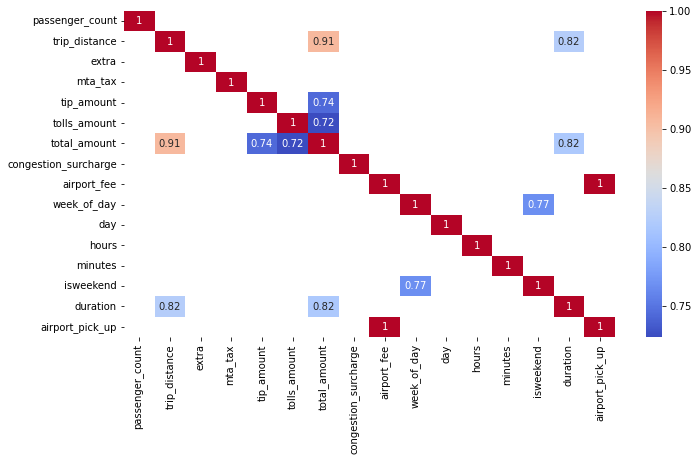

In [113]:
cr=taxi_final.corr()
cr=cr[abs(cr)>.7]
plt.figure(figsize=(11,6))
sns.heatmap(cr, annot=True, cmap="coolwarm")

In [114]:
taxi_final.drop(columns=["airport_fee", "week_of_day"], inplace=True)

In [117]:
taxi_final.columns

Index(['passenger_count', 'trip_distance', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'day', 'hours',
       'minutes', 'isweekend', 'duration', 'airport_pick_up', 'VendorID',
       'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'day_cat',
       'hours_cat', 'duration_cat', 'fare_cat'],
      dtype='object')

In [118]:
taxi_final.drop(columns=["fare_cat"], inplace=True)

### Dummy creation 

In [119]:
final=pd.get_dummies(data=taxi_final, drop_first=True)

C:\Users\Archit\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [120]:
final.head()

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,day,hours,...,day_cat_starting_of_month,hours_cat_Evening,hours_cat_early_morning,hours_cat_midNight,hours_cat_morning,hours_cat_night,duration_cat_duration_bt_15_30m,duration_cat_duration_bt_30_60m,duration_cat_duration_bt_60_120m,duration_cat_duration_morethan_120m
11293,1.0,1.75,0.0,0.5,2.00,0.0,14.80,2.5,1,8,...,1,0,0,0,1,0,0,0,0,0
3241804,1.0,9.16,0.0,0.5,0.00,0.0,39.30,2.5,29,12,...,0,0,0,0,0,0,0,1,0,0
2122208,1.0,5.00,3.0,0.5,2.00,0.0,25.80,2.5,19,1,...,0,0,0,1,0,0,1,0,0,0
645015,1.0,3.02,1.0,0.5,1.78,0.0,19.58,2.5,6,17,...,1,1,0,0,0,0,1,0,0,0
1752107,1.0,3.53,0.5,0.5,2.74,0.0,21.04,2.5,15,22,...,0,0,0,0,0,1,1,0,0,0


In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV , train_test_split, RandomizedSearchCV

In [126]:
y=final["total_amount"]
x=final.drop(columns=["total_amount", "trip_distance"])

In [127]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [128]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [129]:
print("Train_score", rfr.score(x_train, y_train))
print("Test_score", rfr.score(x_test, y_test))

Train_score 0.9952252567336173
Test_score 0.9667026276802231


In [ ]:
# criterion : {"squared_error", "absolute_error", "poisson"}
# mae : absolute_error : L1 error
# mse : squared_error : L2 error

In [131]:
help(rfr)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimat